In [1]:
LABELS=['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt']

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import numpy as np
import gensim
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import ast
import abc
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,accuracy_score
import random
import time
import pandas as pd
import seaborn as sns
import nest_asyncio
nest_asyncio.apply()
import twint
from sklearn import tree

## PART I DATA PREPARATION

In [3]:
def prepare_dataset():
    unpickled_df = pd.read_pickle("raw2.pickle")
    X,Y=unpickled_df['texts'],unpickled_df['info']
    Y=[np.argmax(y['label']) for y in Y]
    return X,Y

X,Y=prepare_dataset()

In [4]:
def preproces_text(text):
    preprocessed=[gensim.utils.simple_preprocess(line) for line in text]
    return preprocessed

In [5]:
preprocessed=preproces_text(X)

In [6]:
def train_model(preprocessed_text):
    model = gensim.models.Word2Vec(
    preprocessed_text,
    size=150,
    window=10,
    min_count=1,
    workers=10,
    iter=300)
    return model

In [7]:
model=train_model(preprocessed)

2019-11-04 00:30:08,116 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2019-11-04 00:30:08,117 : INFO : collecting all words and their counts
2019-11-04 00:30:08,118 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-11-04 00:30:08,146 : INFO : collected 8814 word types from a corpus of 148617 raw words and 7480 sentences
2019-11-04 00:30:08,147 : INFO : Loading a fresh vocabulary
2019-11-04 00:30:08,162 : INFO : effective_min_count=1 retains 8814 unique words (100% of original 8814, drops 0)
2019-11-04 00:30:08,162 : INFO : effective_min_count=1 leaves 148617 word corpus (100% of original 148617, drops 0)
2019-11-04 00:30:08,188 : INFO : deleting the raw counts dictionary of 8814 items
2019-11-04 00:30:08,189 : INFO : sample=0.001 downsamples 52 most-common words
2019-11-04 00:30:08,189 : INFO : downsampling leaves estimated 106730 word corpus (71.8% of prior 148617)
2019-11-04 00:30:08,206 : INFO : estimated required me

2019-11-04 00:30:10,337 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:10,338 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:10,339 : INFO : EPOCH - 7 : training on 148617 raw words (106722 effective words) took 0.1s, 1347059 effective words/s
2019-11-04 00:30:10,404 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:10,409 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:10,411 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:10,412 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:10,413 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:10,414 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:10,414 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:10,417 : INFO : worker threa

2019-11-04 00:30:10,984 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:10,984 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:10,986 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:10,987 : INFO : EPOCH - 15 : training on 148617 raw words (106856 effective words) took 0.1s, 1448484 effective words/s
2019-11-04 00:30:11,047 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:11,054 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:11,058 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:11,058 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:11,059 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:11,060 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:11,061 : INFO : worker thre

2019-11-04 00:30:11,621 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:11,623 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:11,627 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:11,632 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:11,633 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:11,634 : INFO : EPOCH - 23 : training on 148617 raw words (106740 effective words) took 0.1s, 1510383 effective words/s
2019-11-04 00:30:11,695 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:11,702 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:11,704 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:11,704 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:11,705 : INFO : worker thre

2019-11-04 00:30:12,255 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:12,256 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:12,257 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:12,258 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:12,262 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:12,268 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:12,268 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:12,269 : INFO : EPOCH - 31 : training on 148617 raw words (106810 effective words) took 0.1s, 1535828 effective words/s
2019-11-04 00:30:12,329 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:12,335 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:12,341 : INFO : worker thre

2019-11-04 00:30:12,924 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:12,927 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:12,928 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:12,929 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:12,930 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:12,931 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:12,933 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:12,938 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:12,939 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:12,940 : INFO : EPOCH - 39 : training on 148617 raw words (106628 effective words) took 0.1s, 1512992 effective words/s
2019-11-04 00:30:13,000 : INFO : worker thre

2019-11-04 00:30:13,597 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:13,599 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:13,601 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:13,602 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:13,602 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:13,604 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:13,604 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:13,613 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:13,614 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:13,616 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:13,616 : INFO : EPOCH - 47 : training on 148617 raw words (106773 effecti

2019-11-04 00:30:14,193 : INFO : EPOCH - 54 : training on 148617 raw words (106612 effective words) took 0.1s, 1522562 effective words/s
2019-11-04 00:30:14,256 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:14,262 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:14,263 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:14,263 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:14,264 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:14,265 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:14,266 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:14,271 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:14,272 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:14,275 : INFO : worker thre

2019-11-04 00:30:14,852 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:14,853 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:14,854 : INFO : EPOCH - 62 : training on 148617 raw words (106708 effective words) took 0.1s, 1456712 effective words/s
2019-11-04 00:30:14,906 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:14,914 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:14,922 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:14,922 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:14,923 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:14,925 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:14,926 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:14,929 : INFO : worker thre

2019-11-04 00:30:15,517 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:15,520 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:15,525 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:15,527 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:15,527 : INFO : EPOCH - 70 : training on 148617 raw words (106703 effective words) took 0.1s, 1480860 effective words/s
2019-11-04 00:30:15,585 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:15,592 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:15,595 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:15,597 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:15,600 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:15,601 : INFO : worker thre

2019-11-04 00:30:16,182 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:16,184 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:16,187 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:16,192 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:16,193 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:16,194 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:16,195 : INFO : EPOCH - 78 : training on 148617 raw words (106775 effective words) took 0.1s, 1545467 effective words/s
2019-11-04 00:30:16,260 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:16,265 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:16,266 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:16,267 : INFO : worker thre

2019-11-04 00:30:16,841 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:16,842 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:16,842 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:16,844 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:16,844 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:16,845 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:16,854 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:16,854 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:16,856 : INFO : EPOCH - 86 : training on 148617 raw words (106847 effective words) took 0.1s, 1413864 effective words/s
2019-11-04 00:30:16,917 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:16,924 : INFO : worker thre

2019-11-04 00:30:17,502 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:17,503 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:17,504 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:17,511 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:17,512 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:17,514 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:17,517 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:17,520 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:17,526 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:17,527 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:17,528 : INFO : EPOCH - 94 : training on 148617 raw words (106704 effecti

2019-11-04 00:30:18,087 : INFO : EPOCH - 101 : training on 148617 raw words (106752 effective words) took 0.1s, 1580300 effective words/s
2019-11-04 00:30:18,142 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:18,152 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:18,153 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:18,156 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:18,157 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:18,158 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:18,158 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:18,168 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:18,168 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:18,169 : INFO : worker thr

2019-11-04 00:30:18,741 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:18,743 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:18,743 : INFO : EPOCH - 109 : training on 148617 raw words (106706 effective words) took 0.1s, 1396125 effective words/s
2019-11-04 00:30:18,806 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:18,815 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:18,818 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:18,820 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:18,821 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:18,822 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:18,823 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:18,824 : INFO : worker thr

2019-11-04 00:30:19,465 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:19,474 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:19,475 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:19,476 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:19,477 : INFO : EPOCH - 117 : training on 148617 raw words (106772 effective words) took 0.1s, 1430480 effective words/s
2019-11-04 00:30:19,533 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:19,536 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:19,542 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:19,545 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:19,546 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:19,547 : INFO : worker thr

2019-11-04 00:30:20,155 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:20,156 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:20,157 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:20,158 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:20,165 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:20,166 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:20,166 : INFO : EPOCH - 125 : training on 148617 raw words (106567 effective words) took 0.1s, 1306989 effective words/s
2019-11-04 00:30:20,229 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:20,237 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:20,243 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:20,248 : INFO : worker thr

2019-11-04 00:30:20,844 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:20,847 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:20,847 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:20,849 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:20,850 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:20,858 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:20,859 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:20,860 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:20,861 : INFO : EPOCH - 133 : training on 148617 raw words (106667 effective words) took 0.1s, 1377067 effective words/s
2019-11-04 00:30:20,922 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:20,929 : INFO : worker thr

2019-11-04 00:30:21,503 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:21,511 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:21,513 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:21,514 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:21,516 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:21,518 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:21,519 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:21,520 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:21,527 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:21,528 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:21,528 : INFO : EPOCH - 141 : training on 148617 raw words (106692 effect

2019-11-04 00:30:22,133 : INFO : EPOCH - 148 : training on 148617 raw words (106797 effective words) took 0.1s, 1432830 effective words/s
2019-11-04 00:30:22,194 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:22,198 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:22,201 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:22,202 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:22,203 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:22,204 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:22,205 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:22,211 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:22,214 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:22,215 : INFO : worker thr

2019-11-04 00:30:22,816 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:22,817 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:22,817 : INFO : EPOCH - 156 : training on 148617 raw words (106708 effective words) took 0.1s, 1442957 effective words/s
2019-11-04 00:30:22,880 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:22,888 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:22,889 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:22,890 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:22,891 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:22,892 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:22,893 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:22,896 : INFO : worker thr

2019-11-04 00:30:23,470 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:23,473 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:23,480 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:23,480 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:23,481 : INFO : EPOCH - 164 : training on 148617 raw words (106591 effective words) took 0.1s, 1345674 effective words/s
2019-11-04 00:30:23,535 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:23,539 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:23,544 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:23,549 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:23,549 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:23,552 : INFO : worker thr

2019-11-04 00:30:24,113 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:24,115 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:24,119 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:24,121 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:24,126 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:24,127 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:24,127 : INFO : EPOCH - 172 : training on 148617 raw words (106785 effective words) took 0.1s, 1410717 effective words/s
2019-11-04 00:30:24,188 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:24,194 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:24,203 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:24,204 : INFO : worker thr

2019-11-04 00:30:24,813 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:24,814 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:24,815 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:24,816 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:24,816 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:24,817 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:24,822 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:24,825 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:24,826 : INFO : EPOCH - 180 : training on 148617 raw words (106811 effective words) took 0.1s, 1373945 effective words/s
2019-11-04 00:30:24,887 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:24,893 : INFO : worker thr

2019-11-04 00:30:25,450 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:25,459 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:25,461 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:25,462 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:25,462 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:25,463 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:25,464 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:25,468 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:25,473 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:25,474 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:25,475 : INFO : EPOCH - 188 : training on 148617 raw words (106854 effect

2019-11-04 00:30:26,049 : INFO : EPOCH - 195 : training on 148617 raw words (106546 effective words) took 0.1s, 1387407 effective words/s
2019-11-04 00:30:26,102 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:26,109 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:26,113 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:26,116 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:26,117 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:26,118 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:26,118 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:26,127 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:26,128 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:26,129 : INFO : worker thr

2019-11-04 00:30:26,685 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:26,688 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:26,689 : INFO : EPOCH - 203 : training on 148617 raw words (106750 effective words) took 0.1s, 1541373 effective words/s
2019-11-04 00:30:26,743 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:26,746 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:26,752 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:26,752 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:26,753 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:26,754 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:26,762 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:26,763 : INFO : worker thr

2019-11-04 00:30:27,327 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:27,329 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:27,335 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:27,336 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:27,336 : INFO : EPOCH - 211 : training on 148617 raw words (106928 effective words) took 0.1s, 1543741 effective words/s
2019-11-04 00:30:27,386 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:27,396 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:27,399 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:27,400 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:27,401 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:27,402 : INFO : worker thr

2019-11-04 00:30:27,954 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:27,956 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:27,967 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:27,967 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:27,968 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:27,969 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:27,970 : INFO : EPOCH - 219 : training on 148617 raw words (107002 effective words) took 0.1s, 1461057 effective words/s
2019-11-04 00:30:28,011 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:28,027 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:28,030 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:28,032 : INFO : worker thr

2019-11-04 00:30:28,611 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:28,612 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:28,613 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:28,614 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:28,618 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:28,619 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:28,622 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:28,625 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:28,625 : INFO : EPOCH - 227 : training on 148617 raw words (106950 effective words) took 0.1s, 1576893 effective words/s
2019-11-04 00:30:28,677 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:28,680 : INFO : worker thr

2019-11-04 00:30:29,240 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:29,246 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:29,248 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:29,249 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:29,250 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:29,251 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:29,251 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:29,256 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:29,258 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:29,261 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:29,262 : INFO : EPOCH - 235 : training on 148617 raw words (106855 effect

2019-11-04 00:30:29,850 : INFO : EPOCH - 242 : training on 148617 raw words (106796 effective words) took 0.1s, 1515061 effective words/s
2019-11-04 00:30:29,911 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:29,914 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:29,917 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:29,919 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:29,920 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:29,921 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:29,922 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:29,930 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:29,931 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:29,933 : INFO : worker thr

2019-11-04 00:30:30,502 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:30,502 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:30,503 : INFO : EPOCH - 250 : training on 148617 raw words (106723 effective words) took 0.1s, 1416588 effective words/s
2019-11-04 00:30:30,548 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:30,560 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:30,565 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:30,568 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:30,570 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:30,571 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:30,580 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:30,581 : INFO : worker thr

2019-11-04 00:30:31,163 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:31,167 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:31,171 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:31,172 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:31,172 : INFO : EPOCH - 258 : training on 148617 raw words (106704 effective words) took 0.1s, 1438636 effective words/s
2019-11-04 00:30:31,233 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:31,240 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:31,241 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:31,242 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:31,243 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:31,244 : INFO : worker thr

2019-11-04 00:30:31,818 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:31,819 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:31,822 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:31,826 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:31,827 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:31,830 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:31,830 : INFO : EPOCH - 266 : training on 148617 raw words (106744 effective words) took 0.1s, 1427350 effective words/s
2019-11-04 00:30:31,884 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:31,889 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:31,893 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:31,895 : INFO : worker thr

2019-11-04 00:30:32,455 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:32,457 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:32,459 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:32,460 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:32,461 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:32,470 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:32,471 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:32,472 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:32,473 : INFO : EPOCH - 274 : training on 148617 raw words (106806 effective words) took 0.1s, 1437265 effective words/s
2019-11-04 00:30:32,516 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:32,539 : INFO : worker thr

2019-11-04 00:30:33,115 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:33,122 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:33,127 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:33,127 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:33,129 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:33,131 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:33,132 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:33,133 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:33,139 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:33,140 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:33,141 : INFO : EPOCH - 282 : training on 148617 raw words (106654 effect

2019-11-04 00:30:33,736 : INFO : EPOCH - 289 : training on 148617 raw words (106632 effective words) took 0.1s, 1387641 effective words/s
2019-11-04 00:30:33,795 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:33,795 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:33,798 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:33,805 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:33,806 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:33,811 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:33,813 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:33,814 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-04 00:30:33,817 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:33,819 : INFO : worker thr

2019-11-04 00:30:34,396 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-04 00:30:34,397 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-04 00:30:34,397 : INFO : EPOCH - 297 : training on 148617 raw words (106832 effective words) took 0.1s, 1384789 effective words/s
2019-11-04 00:30:34,453 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-11-04 00:30:34,454 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-11-04 00:30:34,456 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-11-04 00:30:34,458 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-11-04 00:30:34,460 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-11-04 00:30:34,460 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-11-04 00:30:34,471 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-04 00:30:34,472 : INFO : worker thr

In [8]:
def get_sentences_representation(model,prepocessed_text):
    result_list=[]
    for splitted_sentence in prepocessed_text:
        length=len(splitted_sentence)
        av_sum=model.wv[splitted_sentence[0]]
        for i in range(1,length):
            av_sum=av_sum+model.wv[splitted_sentence[i]]
        av_sum=av_sum/length
        result_list.append(av_sum)
    return result_list
    

In [9]:
model.wv.most_similar(positive='girlfriend')

2019-11-04 00:31:22,945 : INFO : precomputing L2-norms of word weight vectors


[('boyfriend', 0.5464926958084106),
 ('friend', 0.5100125074386597),
 ('roommate', 0.3658352494239807),
 ('guy', 0.3215855062007904),
 ('cousin', 0.31538817286491394),
 ('mother', 0.30876296758651733),
 ('wife', 0.30669260025024414),
 ('uncle', 0.30283355712890625),
 ('boy', 0.2993827760219574),
 ('daughter', 0.27629488706588745)]

In [10]:
processed_sentences=get_sentences_representation(model,preprocessed)

In [11]:
processed_sentences[38]

array([ 2.27294892e-01, -1.13982010e+00,  1.59046376e+00,  1.95780396e-01,
        8.96866083e-01,  7.59773433e-01,  1.50982344e+00,  4.08981532e-01,
        4.63580310e-01, -1.82266426e+00,  9.70365167e-01,  1.09723091e+00,
        6.52588606e-01,  2.06280708e+00, -3.11663806e-01, -1.13782875e-01,
       -2.93841720e-01,  4.62528080e-01,  1.85535026e+00,  4.92747903e-01,
        2.92832464e-01,  6.18393123e-01,  5.29078603e-01, -1.23366743e-01,
       -7.64570385e-02, -2.98284054e-01, -8.49648058e-01, -4.55071330e-01,
       -8.91480446e-02,  6.36159241e-01,  6.04297638e-01, -5.98243356e-01,
       -1.90351200e+00, -7.22454667e-01, -1.77836883e+00,  2.55528569e-01,
       -7.16589928e-01, -2.10316017e-01, -2.40172982e-01,  2.20323706e+00,
       -8.41453910e-01,  2.67115295e-01,  3.72092724e-02, -9.65347409e-01,
       -3.07208002e-01,  4.70209062e-01,  9.64924276e-01, -1.14555621e+00,
       -1.12519360e+00,  1.19971132e+00,  1.57114863e-01,  1.87291116e-01,
       -7.95944631e-01, -

In [80]:
def save_processed_data_as_npy(features_filename,labels_filename,processed_sentences,Y):
    processed_array=np.array(processed_sentences)
    np.save(features_filename,processed_array)
    np.save(labels_filename,Y)
    
def save_sentence_represantion(processed,labels,filename):
    df = pd.DataFrame(list(zip(processed, labels)), 
               columns =['sentence', 'labels'])
    df.to_csv(filename,index=False)

# save_processed_data_as_npy('features2.npy','lables2.npy',processed_sentences,Y)

## PART I b - Twitter data aquisition (validation dataset)

In [49]:
def scrap_hashtag(tag):
    c = twint.Config()
    c.Search = '#'+tag
    c.Output = 'tweets/'+tag+'.csv'
    c.Custom["tweets"] = ["id", "date", "time", "user_id", "username", "tweet", "replies", "retweets", "likes", "hashtags", "link", "retweet", "user_rt", "mentions"]
    c.Store_csv = True
    c.Limit=50
    c.Lang='en'
    c.Popular_tweets=True
    twint.run.Search(c)
    
def scrap_for_all_categories():
    for label in LABELS:
        scrap_hashtag(label)

In [50]:
scrap_for_all_categories()

1191135466696912896 2019-11-04 00:30:00 CET <90scams> 「 red velvet joy — sunny side up! 90s fancam 」  #REDVELVET #JOY #SUNNYSIDEUP! pic.twitter.com/Vc7k2Pjr3V
1191109546049187840 2019-11-03 22:47:00 CET <_asiLisa> blackpink #LISA and red velvet #JOY chosen by Graphy magazine as the two idols you should cut your bangs like. because they both have a chic, sophisticated and feminine bang style.  pic.twitter.com/lLWOcxa2eU
1191100550374408192 2019-11-03 22:11:15 CET <OmiSooreDryden> She makes me laugh... #Joy  pic.twitter.com/Cl3YlsWYQu
1191085046825988096 2019-11-03 21:09:39 CET <lgibson12397> the 5 things i was grateful today  1 first cuppa☕☕ 2 getting out to take photos🌳 3 a wonderful sky🌄 4 chat with mum💗 5 video chat with sis💞 #mentalhealth #MentalHealthAwareness #MentalHealthMatters #depression #anxiety #mindfulness #grateful #gratitude #Happiness #Joy
1191079548827385856 2019-11-03 20:47:48 CET <patsfan828> Have an awesome Sunday friends ! Enjoy your day ! #joy #friends #happiness #

1190941902478172161 2019-11-03 11:40:50 CET <AnaAqQuintino> A #part in my #joy  https://www.instagram.com/p/B4ZniI3nhoR0eHSsdxp47JC4Q_HChH1jrVqKjE0/?igshid=27kbp07lb9hj …
1190771598174801920 2019-11-03 00:24:07 CET <colette_murphy> Spending time hiking with your kid is pure #joy  pic.twitter.com/jVVXaEhKvq
1190461972061573121 2019-11-02 03:53:46 CET <sharonballeroo> I think I lost my voice cheering for and losing my mind for @PeteButtigieg !!! What a great speech!! 🙌💙🇺🇲🙏 #LJ19 #PeteStorm #CAPeteStorm #Barnstormers4Pete #unity #belonging #joy #Iowa #TeamPete pic.twitter.com/zw90d3FGMk
1190265883194605570 2019-11-01 14:54:35 CET <ReVeluvHaven> 191101 Joy Instagram Story Update  https://instagram.fphx1-3.fna.fbcdn.net/vp/d850605948f1e73283fa5ba3b6145267/5DBEC322/t50.12441-16/74442879_946158575750108_528309530898095445_n.mp4?_nc_ht=instagram.fphx1-3.fna.fbcdn.net … #RedVelvet #Joy @RVsmtown pic.twitter.com/r0ZzHJwwfh
1190198567085977600 2019-11-01 10:27:05 CET <DebrahJnrMusic> Hi November,

1191108695821869059 2019-11-03 22:43:37 CET <Dainjunior> perfect answer🙏🏻🙏🏻🙏🏻#Fear #YClique
1191046310415060993 2019-11-03 18:35:43 CET <whomitmayconcrn> Wouldn’t it suck if you tried to die and end up living with permanent brain damage? That’s what’s stopping me. The #depression is real but the #fear is too.
1190962915853160448 2019-11-03 13:04:20 CET <areejselfcare> Don't fear the unknown it can kill all the beauty of today ✨ #fear #beauty
1190874099851157505 2019-11-03 07:11:25 CET <bournfrey7> #Fear Wow...you see this four letter bastard is one asshole,a true ass that hids in the hole,punishing you,killing you slowly,diminishing your power,elongating your pains,ageing your career. This dude would stop U from doing things that would make you leave him... @BukolaBeejay
1190768751324454912 2019-11-03 00:12:48 CET <greenikkie> What impressed me was not only the fact that #Insooni, such a legendary Korean artist confessed that Mino's #Fear the lyrics had consoled her so much but also th

1191105073255833600 2019-11-03 22:29:13 CET <angry_birds_s> #Anger is just anger. It isnt good. It isn't bad. What u do with it is what matters. U can use it to build or to destroy.-Jim Butcher #quote
1190970682232000513 2019-11-03 13:35:12 CET <SJanosick> Did you know the the National #Anger Management Association has it’s own code of #ethics for providers? Ethical practice is incredibly important in promoting the #humanrights of our clients.  https://www.namass.org/code-of-ethics.html …
1190962288884428800 2019-11-03 13:01:51 CET <RestoreControl> People abuse substances to suppress difficult feelings, especially sadness - but where do these feeling go? They don’t go...  that’s why men are more likely to have anger issues - because it’s less accepted in the society for a man to be sad... #sadness #anger #suppressing
1190895025028096001 2019-11-03 08:34:34 CET <ProwisdomG> Anger is an acid that can do more harm to the vessel in which it is stored than to anything on which it is poured.

1191045705588264963 2019-11-03 18:33:19 CET <testisfidelis> Troubadours Sailing Hibiscus Seas:  A Father's Love Letter to HIs Aborted Child   https://christsfaithfulwitness.blogspot.co.at/2018/01/forgotten-fathers-waiting-room-men-in_16.html#.Wskqty97FMM … #Sadness of the Choiceless  #mentalhealth pic.twitter.com/JLUKcGkjW3
1190962288884428800 2019-11-03 13:01:51 CET <RestoreControl> People abuse substances to suppress difficult feelings, especially sadness - but where do these feeling go? They don’t go...  that’s why men are more likely to have anger issues - because it’s less accepted in the society for a man to be sad... #sadness #anger #suppressing
1190819263147364355 2019-11-03 03:33:31 CET <sf_ebi> I just realized that I didn’t eat much today... 💙😞 #sadness  pic.twitter.com/kSTZ680tu2
1190696458854576128 2019-11-02 19:25:32 CET <amelia38637865> Do you have that nights when you just stay up late and think of your life? #sad #mood #true #sadness
1190307631837171719 2019-11-01 17:40

1190585910586413056 2019-11-02 12:06:15 CET <LLetaparsons> @ASPolice @nationaltrust  You become more #disgraceful and in #Collusion with the despicable #hunting #fraternity How are the animal loving public supposed to trust and rely on you in everyday criminal circumstances when you can't do your job protecting our #wildlife!  #disgust  https://twitter.com/huntwatchuk/status/1190232961620303873 …
1190288479416193024 2019-11-01 16:24:22 CET <VickyG323> Are Republicans just the best?? #disgust  https://twitter.com/John_Henson/status/1190236578469122048 …
1190188207935283200 2019-11-01 09:45:56 CET <TJTToTaL> Another reason to boycott abuse supporting #Spain. #disgust #changethelaw #respect #justice They don't give a damn about people, but hurt their cash and they will react. https://www.bbc.com/news/world-europe-50257922 …
1189841058445905922 2019-10-31 10:46:29 CET <ammann_jeanine> Join us tonight for the poster presentation, where we put our research in context with the sustainable dev

1191144021151760384 2019-11-04 01:03:59 CET <curse10outta10> JFC. Sooooo, you're just gonna double down on your ignorance......#SHAME  pic.twitter.com/zI7YCI4VXG
1190921744577683456 2019-11-03 10:20:44 CET <Sunny_jaiswall> #Shame on Governments @PMOIndia @ArvindKejriwal https://twitter.com/DrKumarVishwas/status/1190869195677827072 …
1190909053393940480 2019-11-03 09:30:19 CET <enspixenalacara> Where is my vote? I'm not represented in EU. #Shame  pic.twitter.com/fqfBKGk0Co
1190874039130083331 2019-11-03 07:11:10 CET <comrade_iam> Is this independent media...??? I think they innocent peoples don't know the fact that India is a secular country.. Or they are living in india. #shame #godimedia pic.twitter.com/VZF4l3Igi0
1190870679425413120 2019-11-03 06:57:49 CET <xboxhoneybear11> Caught these teaming on a solo match after they tag teamed me. #shame #CallofDutyBlackOps4 #XboxShare pic.twitter.com/3AWYlaYwtd
1190725544419188736 2019-11-02 21:21:07 CET <MaryAliceBisho2> More disgrace to our W

1191107386049740800 2019-11-03 22:38:25 CET <S0LDIER_GAMING> LP OR JP OR GP THEY ALL NEEDS TO BE GO FAR AWAY FROM EARTH.  #PAULS Will be banned from the earth itself.  You mess with nature and the nature shall mark your name as shame🛎 shame🛎 shame 🛎 #shame  pic.twitter.com/G3JIj1x7Tq
1191107279967252480 2019-11-03 22:37:59 CET <JudithMilch> This is what hate, division & racism look like. Teaching xenophobia to your kids is a sin. Encouraging your children to believe that asylum seekers, refugees & immigrants (who are risking their very lives to come to the US), are criminals, terrorists & dirty scum, is EVIL. #Shame  https://twitter.com/Alyssa_Milano/status/1190998363728035841 …
1191104318105169920 2019-11-03 22:26:13 CET <UmairJibran7> Everyone posting shit with the tag of “#IAmRabiPirzada” this is how she responded, with Islamic reference and ya’ll responding with some dare given by the Curator who btw is ANTI-Islam. #Shame!! #SaveASoul  pic.twitter.com/qKvux0En8B
1191061000063111168

1191134358121451521 2019-11-04 00:25:35 CET <KryssieFortune> Acknowledging Our Limits - #Rescue #Responsibility #Guilt via @LisabetSarai  http://trbr.io/81K3Sol 
1191133366822809601 2019-11-04 00:21:39 CET <MrGeostak> #Guilt ep2 just gets better and better.  @BBCScotland
1191124154122227715 2019-11-03 23:45:03 CET <JEJjohns> Absolutely loving #Guilt!  Brilliantly dark and funny.  Please oh please when is the next episode available? @BBCScotland @mark_bonnar
1191123603460427776 2019-11-03 23:42:51 CET <TheRealMcGack> Started watching #Guilt on the iPlayer, pretty good so far.  pic.twitter.com/L1cdSQL8mE
1191113210067329024 2019-11-03 23:01:33 CET <macg_sarah> What an absolutely CRACKING script @mrneilforsyth loved #Guilt on bbc iplayer. And lovely to hear (those somewhat deranged) Edinburgh voices on screen. Xx
1191105867145502720 2019-11-03 22:32:23 CET <JulietBravo41> Nice twist @brazenprods #Guilt episode 2 ...
1190397392237088772 2019-11-01 23:37:09 CET <Foney_gee> Just catching up 

In [59]:
def get_all_tweets():
    messages=[]
    labels=[]
    for label in LABELS:
        label_tweets=pd.read_csv('tweets/'+label+'.csv')
        label_y=[LABELS.index(label) for i in range(50)]
        label_x=label_tweets['tweet'].tolist()[:50]
        messages.extend(label_x)
        labels.extend(label_y)
    return messages,labels

In [60]:
messages,labels=get_all_tweets()

In [63]:
preprocessed_mes=preproces_text(messages)

In [70]:
vocab=model.wv.vocab.keys()

In [72]:
def filter_for_words_in_vocab(unfiltered,vocab):
    result_list=[]
    for sentence_list in unfiltered:
        res_sentence=[]
        for word in sentence_list:
            if word in vocab:
                res_sentence.append(word)
        result_list.append(res_sentence)
    return result_list

In [73]:
filtered_mes=filter_for_words_in_vocab(preprocessed_mes,vocab)

In [75]:
processed_mes=get_sentences_representation(model,filtered_mes)

In [81]:
save_processed_data_as_npy('features_tweets.npy','lables_tweets.npy',processed_mes,labels)

## PART II - MLP classifier

In [13]:
def prepare_processed_dataset(features_filename,labels_filename):
    X=np.load(features_filename)
    Y=np.load(labels_filename)
    split_index=int(0.8*len(X))
    x_train,y_train=X[0:split_index],Y[0:split_index]
    x_test,y_test=X[split_index:],Y[split_index:]
    y_train=np.reshape(y_train,newshape=(y_train.shape[0],1))
    y_test=np.reshape(y_test,newshape=(y_test.shape[0],1))
    return x_train,y_train,x_test,y_test

x_train,y_train,x_test,y_test=prepare_processed_dataset('features2.npy','lables2.npy')

In [14]:
class AbstractLayer(tf.keras.layers.Layer):
    """Abstract Layer."""
    
    def __init__(self):
        """Inits the class."""
        super(AbstractLayer, self).__init__()
    
    @abc.abstractmethod
    def call(self, inputs):
        """Makes forward pass of the layer"""
        pass


class AbstractModel(tf.keras.Model):
    """Abstract model."""

    def __init__(self):
        """Inits the class."""
        super(AbstractModel, self).__init__()

    @abc.abstractmethod
    def call(self, inputs, training=False):
        """Makes forward pass of the network."""
        pass

    @abc.abstractmethod
    def fit(self, **kwargs):
        """Implements learning loop for the model.
        
        kwargs can contain optional parameters such as 
        num_epochs, batch_size, etc.
        """
        pass

    @abc.abstractmethod
    def predict(self, x):
        """Predicts outputs based on inputs (x)."""
        pass

In [15]:
class ConnectedLayer(AbstractLayer):

  def __init__(self, input_size,output_size,activation_function,weight_init='random_uniform',bias_init='zeros'):
    super(ConnectedLayer,self).__init__()
    self.w = self.add_weight(shape=(input_size,output_size,),
                             initializer=weight_init,
                             trainable=True)
    self.b = self.add_weight(shape=(1,output_size),
                             initializer=bias_init,
                             trainable=True)
    self.activation_function=activation_function

  def call(self, inputs):
    return self.activation_function(tf.matmul(inputs, self.w) + self.b)

In [16]:
class MLPModel(AbstractModel):
    """Constructor accepts list of tuples 
       [<input_size,output_size,activation_fuction>,...] 
       describing each layer
    """
    def __init__(self,input_size,output_size,hidden_size,hidden_layers,activation_function,weight_init,bias_init):
        super(MLPModel, self).__init__()
        self.first_layer=ConnectedLayer(input_size,hidden_size,activation_function,weight_init,bias_init)
        self.hidden_inner_layers=[]
        for i in range(hidden_layers-1):
            self.hidden_inner_layers.append(ConnectedLayer(hidden_size,hidden_size,activation_function,weight_init,bias_init))
        self.last_layer=ConnectedLayer(hidden_size,output_size,tf.keras.layers.Activation(tf.nn.softmax),weight_init,bias_init)
        self.train_learning_accuracy=[]
        self.test_learning_accuracy=[]
        self.train_learning_losses=[]
        self.test_learning_losses=[]
        self.train_times=[]
        self.train_f1=[]
        self.test_f1=[]

    def call(self, inputs, training=False):
        res=self.first_layer(inputs)
        for layer in self.hidden_inner_layers:
            res=layer(res)
        return self.last_layer(res)
    
    def total_learning_time(self):
        return sum(self.train_times)
    
    def average_epoch_time(self):
        return sum(self.train_times)/len(self.train_times)
        
    
    @tf.function
    def train_step(self,images, labels,optimizer,loss_function, train_loss_metric,train_accuracy):
        with tf.GradientTape() as tape:
            predictions = self(images)
            loss = loss_function(labels, predictions)
        gradients = tape.gradient(loss, self.trainable_variables)
        optimizer.apply_gradients(zip(gradients, self.trainable_variables))
        train_loss_metric(loss)
        train_accuracy(labels, predictions)
        
    @tf.function
    def test_step(self,images, labels,loss_function,test_loss_metric,test_accuracy):
        predictions = self(images)
        t_loss = loss_function(labels, predictions)
        test_loss_metric(t_loss)
        test_accuracy(labels, predictions)

    def fit(self,train_xs,train_ys,test_xs,test_ys,loss_function=tf.keras.losses.SparseCategoricalCrossentropy,
            epochs=5,optimizer=tf.keras.optimizers.Adam,learning_rate=0.01,batch_size=100,verbose=False):
        
        train_ds = tf.data.Dataset.from_tensor_slices((train_xs,train_ys)).shuffle(5000).batch(batch_size)
        
        test_ds = tf.data.Dataset.from_tensor_slices((test_xs, test_ys)).batch(batch_size)
        
        optimizer = optimizer(learning_rate=learning_rate)
        
        loss_function=loss_function()
        
        self.train_learning_accuracy=[]
        self.test_learning_accuracy=[]
        self.train_learning_losses=[]
        self.test_learning_losses=[]
        self.train_times=[]
        self.train_f1=[]
        self.test_f1=[]

        train_loss_metric = tf.keras.metrics.Mean(name='train_loss_metric')
        train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

        test_loss_metric = tf.keras.metrics.Mean(name='test_loss_metric')
        test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')
        
        for epoch in tqdm(range(epochs)):
            for batch_images,batch_labels in train_ds:
                start_point = time.time()
                self.train_step(batch_images, batch_labels,optimizer,loss_function,train_loss_metric,train_accuracy)
                self.train_times.append(time.time()-start_point)

            for test_images, test_labels in test_ds:
                self.test_step(test_images, test_labels,loss_function,test_loss_metric,test_accuracy)
                
            predicted_train=self.predict(train_xs)
            f1_train=f1_score(train_ys.transpose()[0], predicted_train, average='micro') 
            self.train_f1.append(f1_train)
            
            predicted_test=self.predict(test_xs)
            f1_test=f1_score(test_ys.transpose()[0], predicted_test, average='micro') 
            self.test_f1.append(f1_test)
            if verbose:
                template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}, Time: {}, F1_train: {}, F1_test: {}'
                print(template.format(epoch+1,
                            train_loss_metric.result(),
                            train_accuracy.result()*100,
                            test_loss_metric.result(),
                            test_accuracy.result()*100,
                            self.train_times[-1],
                            f1_train,f1_test))
            self.train_learning_accuracy.append(train_accuracy.result().numpy()*100)
            self.test_learning_accuracy.append(test_accuracy.result().numpy()*100)
            self.train_learning_losses.append(train_loss_metric.result().numpy())
            self.test_learning_losses.append(test_loss_metric.result().numpy())

            # Reset the metrics for the next epoch
            train_loss_metric.reset_states()
            train_accuracy.reset_states()
            test_loss_metric.reset_states()
            test_accuracy.reset_states()
    
    def predict(self, x):
        res=self.first_layer(x)
        for layer in self.hidden_inner_layers:
            res=layer(res)
        res=self.last_layer(res)
        return np.argmax(res,axis=-1)

In [17]:
mlp_model=MLPModel(input_size=150,output_size=10,hidden_size=70,hidden_layers=3,
               activation_function=tf.keras.layers.Activation(tf.nn.relu),
               weight_init='random_uniform',bias_init='zeros')

In [18]:
mlp_model.fit(x_train,y_train,x_test,y_test,
            optimizer=tf.keras.optimizers.Adam,
            learning_rate=0.0002,
            epochs=120,batch_size=100,
            verbose=True)

Epoch 1, Loss: 2.2769010066986084, Accuracy: 14.722593307495117, Test Loss: 2.1895751953125, Test Accuracy: 15.040106773376465, Time: 0.15805268287658691, F1_train: 0.1488970588235294, F1_test: 0.15040106951871657
Epoch 2, Loss: 2.0210251808166504, Accuracy: 15.157085418701172, Test Loss: 1.959557056427002, Test Accuracy: 14.371657371520996, Time: 0.000659942626953125, F1_train: 0.1455548128342246, F1_test: 0.14371657754010694
Epoch 3, Loss: 1.9491115808486938, Accuracy: 15.758689880371094, Test Loss: 1.9477927684783936, Test Accuracy: 15.441176414489746, Time: 0.0006661415100097656, F1_train: 0.14756016042780748, F1_test: 0.15441176470588236
Epoch 4, Loss: 1.9298406839370728, Accuracy: 20.070188522338867, Test Loss: 1.9126231670379639, Test Accuracy: 25.86898422241211, Time: 0.0006721019744873047, F1_train: 0.27389705882352944, F1_test: 0.2586898395721925
Epoch 5, Loss: 1.8611512184143066, Accuracy: 27.205881118774414, Test Loss: 1.8101156949996948, Test Accuracy: 27.94117546081543, T

Epoch 39, Loss: 1.2980598211288452, Accuracy: 51.50400924682617, Test Loss: 1.410778284072876, Test Accuracy: 50.80214309692383, Time: 0.0006420612335205078, F1_train: 0.5212232620320856, F1_test: 0.5080213903743316
Epoch 40, Loss: 1.2952532768249512, Accuracy: 51.520721435546875, Test Loss: 1.4075361490249634, Test Accuracy: 49.93315505981445, Time: 0.0006866455078125, F1_train: 0.5257352941176471, F1_test: 0.49933155080213903
Epoch 41, Loss: 1.2902182340621948, Accuracy: 52.022056579589844, Test Loss: 1.4066588878631592, Test Accuracy: 50.40106964111328, Time: 0.0008778572082519531, F1_train: 0.52423128342246, F1_test: 0.5040106951871658
Epoch 42, Loss: 1.2874245643615723, Accuracy: 52.1557502746582, Test Loss: 1.4089950323104858, Test Accuracy: 49.465240478515625, Time: 0.0007650852203369141, F1_train: 0.5238970588235294, F1_test: 0.4946524064171123
Epoch 43, Loss: 1.2870475053787231, Accuracy: 52.45655059814453, Test Loss: 1.4108840227127075, Test Accuracy: 50.13368606567383, Time:

Epoch 77, Loss: 1.2061865329742432, Accuracy: 55.88235092163086, Test Loss: 1.4109222888946533, Test Accuracy: 50.26737976074219, Time: 0.0007219314575195312, F1_train: 0.5611631016042781, F1_test: 0.5026737967914439
Epoch 78, Loss: 1.203755497932434, Accuracy: 55.93248748779297, Test Loss: 1.3940738439559937, Test Accuracy: 51.47058868408203, Time: 0.0008080005645751953, F1_train: 0.5636697860962567, F1_test: 0.5147058823529411
Epoch 79, Loss: 1.1986865997314453, Accuracy: 56.18315505981445, Test Loss: 1.4030852317810059, Test Accuracy: 50.601600646972656, Time: 0.0008080005645751953, F1_train: 0.5631684491978609, F1_test: 0.5060160427807486
Epoch 80, Loss: 1.1978609561920166, Accuracy: 56.06617736816406, Test Loss: 1.4001303911209106, Test Accuracy: 51.1363639831543, Time: 0.0007109642028808594, F1_train: 0.5646724598930482, F1_test: 0.5113636363636364
Epoch 81, Loss: 1.1938167810440063, Accuracy: 56.35026550292969, Test Loss: 1.3951869010925293, Test Accuracy: 51.67112350463867, Tim

Epoch 116, Loss: 1.0922391414642334, Accuracy: 60.3442497253418, Test Loss: 1.4178019762039185, Test Accuracy: 52.07218933105469, Time: 0.0006301403045654297, F1_train: 0.6052807486631016, F1_test: 0.5207219251336899
Epoch 117, Loss: 1.0855194330215454, Accuracy: 60.5447883605957, Test Loss: 1.422494888305664, Test Accuracy: 52.40641784667969, Time: 0.0007030963897705078, F1_train: 0.6099598930481284, F1_test: 0.5240641711229946
Epoch 118, Loss: 1.0833933353424072, Accuracy: 60.411094665527344, Test Loss: 1.4279210567474365, Test Accuracy: 52.00534439086914, Time: 0.0006372928619384766, F1_train: 0.6102941176470589, F1_test: 0.5200534759358288
Epoch 119, Loss: 1.0785847902297974, Accuracy: 60.82887649536133, Test Loss: 1.4261609315872192, Test Accuracy: 52.60695266723633, Time: 0.0006198883056640625, F1_train: 0.6094585561497327, F1_test: 0.5260695187165776
Epoch 120, Loss: 1.0779699087142944, Accuracy: 60.62834167480469, Test Loss: 1.429060697555542, Test Accuracy: 52.1390380859375, T

In [19]:
def visualize_learning(model):
    sns.set()
    fig, (error_subplot, accuracy_subplot) = plt.subplots(1, 2,figsize=(15,5))
    epochs=[i+1 for i in range(len(model.train_learning_accuracy))]
    
    train_errors,test_errors=model.train_learning_losses,model.test_learning_losses
    train_accuracy,test_accuracy=model.train_learning_accuracy,model.test_learning_accuracy

    accuracy_subplot.plot(epochs,train_accuracy,linestyle='--', marker='o', color='green', label='Traing set accuracy')
    accuracy_subplot.plot(epochs,test_accuracy,linestyle='--', marker='o', color='blue', label='Test set accuracy')
    accuracy_subplot.set_title("Model accuracy change per epoch")
    accuracy_subplot.set_xlabel('Epochs')
    accuracy_subplot.set_ylabel('Loss')
    accuracy_subplot.legend(loc="upper left")
    
    error_subplot.plot(epochs,train_errors,linestyle='--', marker='o', color='red',label='Traing set loss')
    error_subplot.plot(epochs,test_errors,linestyle='--', marker='o', color='orange',label='Test set loss')
    error_subplot.set_title("Model loss change per epoch")
    error_subplot.set_xlabel('Epochs')
    error_subplot.set_ylabel('Loss')
    error_subplot.legend(loc="upper right")

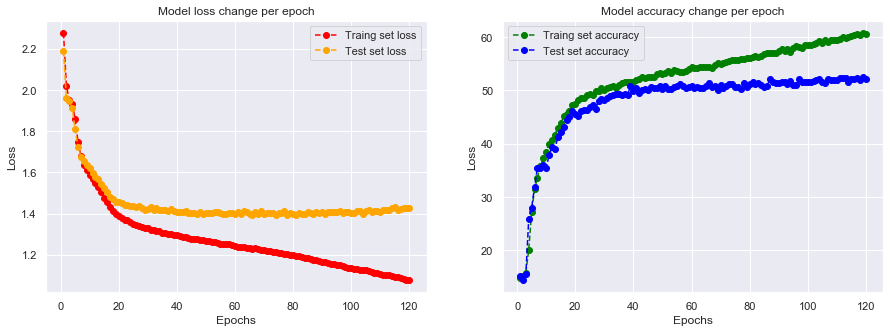

In [20]:
visualize_learning(mlp_model)

In [21]:
predicted_labels=mlp_model.predict(x_test)

[[154   5  14   9  15  15   4]
 [ 12 148  10   3  15  16  12]
 [ 15   7  87   5  31  42  28]
 [ 32  16  20  92  17  22  15]
 [  5   3  46   4 121  25   9]
 [ 18  11  26   8  23 100  25]
 [ 11  11  46  13  16  36  78]]


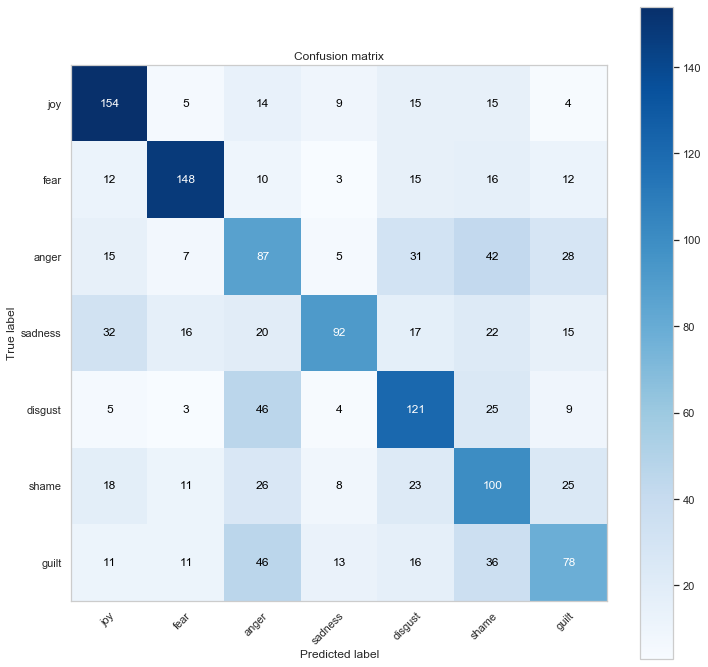

In [22]:
def visualize_confusion_matrix(y_true, y_pred, classes,
                          title=None):

    sns.set_style("whitegrid", {'axes.grid' : False})
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    fig, ax = plt.subplots(figsize=(12,12))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    
    #setting labels
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),

           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # label rotation
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # text annotations
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #bug workarond
    ax.set_ylim(len(classes)-0.5, -0.5)
    return ax

visualize_confusion_matrix(y_test, predicted_labels, classes=LABELS,
                      title='Confusion matrix')

In [41]:
###ALTERNATIVE CLASSIFIERS PROBE

def train_svm():
    clf = svm.SVC(gamma='scale')
    clf.fit(x_train, y_train) 
    predicted_svm=clf.predict(x_test)
    svm_acc=accuracy_score(y_test, predicted_svm) 
    print(svm_acc)
    #Accuracy 30%
    
def train_decision_tree():
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(x_train, y_train)
    predicted_tree=clf.predict(x_test)
    tree_acc=accuracy_score(y_test, predicted_tree) 
    print(tree_acc)
    #18 %

## PART III Validation on Twitter data

In [82]:
def read_tweets_validation_set(features_filename,labels_filename):
    X=np.load(features_filename)
    Y=np.load(labels_filename)
    return X,Y

x_val,y_val=read_tweets_validation_set('features_tweets.npy','lables_tweets.npy')

In [83]:
predicted_val=mlp_model.predict(x_val)

In [84]:
print(accuracy_score(y_val, predicted_val))

0.5228571428571429


[[39  1  2  3  5  0  0]
 [ 1 31  0  4  8  4  2]
 [ 1  1 22  5  9  2 10]
 [ 3  4  1 28  6  1  7]
 [ 1  2  2  4 37  3  1]
 [ 4  1  3  1 25 14  2]
 [ 3 11 10  4  7  3 12]]


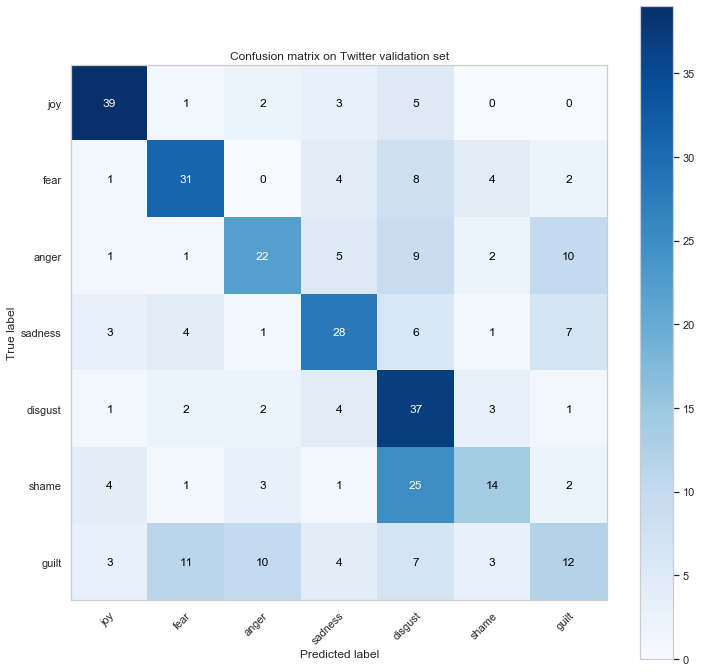

In [85]:
visualize_confusion_matrix(y_val, predicted_val, classes=LABELS,
                      title='Confusion matrix on Twitter validation set')